In [64]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [66]:
# Load dataset
url = "CarPrice_Assignment.csv"
df = pd.read_csv(url)

In [68]:
# 1. Preprocessing
# Check for missing values
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [70]:
# Handle missing data
# Filling missing numerical values with the mean
df.fillna(df.mean(), inplace=True)

TypeError: Could not convert ['alfa-romero giuliaalfa-romero stelvioalfa-romero Quadrifoglioaudi 100 lsaudi 100lsaudi foxaudi 100lsaudi 5000audi 4000audi 5000s (diesel)bmw 320ibmw 320ibmw x1bmw x3bmw z4bmw x4bmw x5bmw x3chevrolet impalachevrolet monte carlochevrolet vega 2300dodge rampagedodge challenger sedodge d200dodge monaco (sw)dodge colt hardtopdodge colt (sw)dodge coronet customdodge dart customdodge coronet custom (sw)honda civichonda civic cvcchonda civichonda accord cvcchonda civic cvcchonda accord lxhonda civic 1500 glhonda accordhonda civic 1300honda preludehonda accordhonda civichonda civic (auto)isuzu MU-Xisuzu D-Max isuzu D-Max V-Crossisuzu D-Max jaguar xjjaguar xfjaguar xkmaxda rx3maxda glc deluxemazda rx2 coupemazda rx-4mazda glc deluxemazda 626mazda glcmazda rx-7 gsmazda glc 4mazda 626mazda glc custom lmazda glc custommazda rx-4mazda glc deluxemazda 626mazda glcmazda rx-7 gsbuick electra 225 custombuick century luxus (sw)buick centurybuick skyhawkbuick opel isuzu deluxebuick skylarkbuick century specialbuick regal sport coupe (turbo)mercury cougarmitsubishi miragemitsubishi lancermitsubishi outlandermitsubishi g4mitsubishi mirage g4mitsubishi g4mitsubishi outlandermitsubishi g4mitsubishi mirage g4mitsubishi monteromitsubishi pajeromitsubishi outlandermitsubishi mirage g4Nissan versanissan gt-rnissan roguenissan lationissan titannissan leafnissan jukenissan lationissan notenissan clippernissan roguenissan nv200nissan dayznissan fuganissan ottinissan teananissan kicksnissan clipperpeugeot 504peugeot 304peugeot 504 (sw)peugeot 504peugeot 504peugeot 604slpeugeot 504peugeot 505s turbo dieselpeugeot 504peugeot 504peugeot 604slplymouth fury iiiplymouth cricketplymouth fury iiiplymouth satellite custom (sw)plymouth fury gran sedanplymouth valiantplymouth dusterporsche macanporcshce panameraporsche cayenneporsche boxterporsche cayennerenault 12tlrenault 5 gtlsaab 99esaab 99lesaab 99lesaab 99glesaab 99glesaab 99esubarusubaru dlsubaru dlsubarusubaru brzsubaru bajasubaru r1subaru r2subaru treziasubaru tribecasubaru dlsubaru dltoyota corona mark iitoyota coronatoyota corolla 1200toyota corona hardtoptoyota corolla 1600 (sw)toyota carinatoyota mark iitoyota corolla 1200toyota coronatoyota corollatoyota coronatoyota corollatoyota mark iitoyota corolla liftbacktoyota coronatoyota celica gt liftbacktoyota corolla terceltoyota corona liftbacktoyota corollatoyota starlettoyota terceltoyota corollatoyota cressidatoyota corollatoyota celica gttoyota coronatoyota corollatoyota mark iitoyota corolla liftbacktoyota coronatoyota starlettoyouta tercelvokswagen rabbitvolkswagen 1131 deluxe sedanvolkswagen model 111volkswagen type 3volkswagen 411 (sw)volkswagen super beetlevolkswagen dashervw dashervw rabbitvolkswagen rabbitvolkswagen rabbit customvolkswagen dashervolvo 145e (sw)volvo 144eavolvo 244dlvolvo 245volvo 264glvolvo dieselvolvo 145e (sw)volvo 144eavolvo 244dlvolvo 246volvo 264gl'
 'gasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasdieselgasgasdieseldieseldieseldieseldieselgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasdieselgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasdieselgasdieselgasdieselgasdieselgasdieselgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasgasdieseldieselgasgasgasgasgasgasgasgasgasgasgasgasgasgasdieselgasgasgasgasgasgasgasdieselgasdieselgasgasdieselgasgasgasgasdieselgasgasgasgasgasgasgasgasgasgasdieselgas'
 'stdstdstdstdstdstdstdstdturboturbostdstdstdstdstdstdstdstdstdstdstdstdstdturbostdstdstdturbostdturbostdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdturboturboturboturbostdstdstdstdturbostdstdstdturboturbostdturboturboturbostdstdturbostdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdturbostdstdturbostdturbostdturbostdturbostdturboturbostdturbostdstdstdstdturbostdstdstdstdstdstdstdstdstdstdstdturboturbostdstdstdstdstdstdstdturbostdstdstdturbostdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdstdturbostdstdstdstdstdstdstdstdstdstdstdstdturbostdstdstdstdturbostdstdstdstdstdturboturbostdturbostdturboturbo'
 'twotwotwofourfourtwofourfourfourtwotwofourtwofourfourfourtwofourtwotwofourtwotwotwofourfourfourtwofourtwotwotwotwotwotwofourfourtwotwofourfourfourtwofourtwofourtwofourfourtwotwotwotwofourfourtwotwotwotwotwofourtwofourfourfourfourfourfourfourtwofourfourtwofourtwotwotwotwotwotwotwotwotwotwotwofourfourfourfourtwotwotwofourfourtwotwofourfourtwofourfourfourfourfourtwotwotwofourfourfourfourfourfourfourfourfourfourfourtwotwofourfourfourfourtwotwotwotwotwotwofourtwotwofourtwofourtwofourtwotwotwofourfourfourfourfourfourfourfourfourtwotwofourfourfourfourfourfourfourfourfourfourfourtwotwotwotwotwotwotwotwotwotwofourfourfourfourfourtwotwofourfourtwotwofourfourfourfourfourtwotwofourfourfourfourfourfourfourfourfourfourfourfourfourfour'
 'convertibleconvertiblehatchbacksedansedansedansedanwagonsedanhatchbacksedansedansedansedansedansedansedansedanhatchbackhatchbacksedanhatchbackhatchbackhatchbackhatchbacksedansedansedanwagonhatchbackhatchbackhatchbackhatchbackhatchbackhatchbacksedanwagonhatchbackhatchbacksedansedansedansedansedansedansedanhatchbacksedansedansedanhatchbackhatchbackhatchbacksedansedanhatchbackhatchbackhatchbackhatchbackhatchbacksedanhatchbacksedansedanhatchbacksedansedansedanwagonhardtopsedansedanconvertiblesedanhardtophatchbackhatchbackhatchbackhatchbackhatchbackhatchbackhatchbackhatchbackhatchbackhatchbacksedansedansedansedansedansedansedansedanwagonsedanhatchbacksedanwagonhardtophatchbacksedansedanwagonsedanhatchbackhatchbackhatchbacksedansedanwagonwagonsedansedanwagonwagonsedansedansedanhatchbackhatchbackhatchbacksedansedanwagonhatchbackhatchbackhardtophardtopconvertiblehatchbackwagonhatchbackhatchbacksedanhatchbacksedanhatchbacksedanhatchbackhatchbackhatchbacksedansedansedansedansedanwagonwagonwagonwagonhatchbackhatchbackhatchbackwagonwagonwagonsedanhatchbacksedanhatchbacksedanhatchbacksedansedanhatchbacksedanhatchbackhardtophardtophatchbackhardtophatchbackconvertiblesedansedanhatchbacksedanhatchbackhatchbackhatchbacksedanwagonsedansedansedansedansedansedansedanconvertiblehatchbacksedansedanwagonsedanwagonsedanwagonsedanwagonsedansedansedansedansedan'
 'rwdrwdrwdfwd4wdfwdfwdfwdfwd4wdrwdrwdrwdrwdrwdrwdrwdrwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdrwdfwdfwdrwdrwdrwdrwdfwdfwdfwdfwdfwdrwdrwdrwdrwdfwdfwdfwdfwdfwdfwdrwdrwdrwdrwdrwdrwdrwdrwdrwdrwdrwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdrwdrwdrwdrwdrwdrwdrwdrwdrwdrwdrwdrwdrwdrwdfwdfwdfwdfwdfwdfwdrwdrwdrwdrwdrwdrwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwd4wdfwdfwdfwd4wd4wdfwdfwd4wd4wdfwdfwdfwdfwd4wd4wdfwdfwdfwdfwdfwdfwdfwdrwdrwdrwdrwdrwdrwdrwdrwdrwdrwdfwdfwdfwdfwdfwdrwdrwdrwdrwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdfwdrwdrwdrwdrwdrwdrwdrwdrwdrwdrwdrwd'
 'frontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontrearrearrearfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfrontfront'
 'dohcdohcohcvohcohcohcohcohcohcohcohcohcohcohcohcohcohcohclohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcdohcdohcohcvohcohcohcohcohcrotorrotorrotorrotorohcohcohcohcohcohcohcohcohcohcohcohcohcvohcvohcvohcvohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcvohcvohcvohcvohcvohcvlllllllllllohcohcohcohcohcohcohcohcohcfohcfohcfdohcvohcohcohcohcohcohcdohcdohcohcfohcfohcfohcfohcfohcfohcfohcfohcfohcfohcfohcfohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcdohcdohcohcohcohcohcohcohcohcohcohcohcohcdohcdohcdohcdohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcohcvohcohc'
 'fourfoursixfourfivefivefivefivefivefivefourfoursixsixsixsixsixsixthreefourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfoursixsixtwelvefourfourfourfourfourtwotwotwotwofourfourfourfourfourfourfourfourfivefivefivefiveeighteighteighteightfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfoursixsixsixsixsixsixfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfoursixsixsixeightfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfourfoursixsixsixsixfourfourfourfourfourfourfourfourfourfivefourfourfourfourfourfourfourfourfourfoursixsixfour'
 'mpfimpfimpfimpfimpfimpfimpfimpfimpfimpfimpfimpfimpfimpfimpfimpfimpfimpfi2bbl2bbl2bbl2bbl2bblmpfi2bbl2bbl2bblmpfi2bblmfi1bbl1bbl1bbl1bbl1bbl1bbl1bbl1bbl1bbl1bbl1bblmpfi2bbl2bbl2bbl2bblspfimpfimpfimpfi2bbl2bbl2bbl2bbl2bbl4bbl4bbl4bblmpfi2bbl2bbl2bbl2bblidi2bblmpfiidiidiidiidiidimpfimpfimpfimpfimpfi2bbl2bbl2bblspdispdi2bblspdispdispdi2bbl2bblspdispdi2bblidi2bbl2bbl2bbl2bbl2bbl2bbl2bbl2bbl2bbl2bblmpfimpfimpfimpfimpfimpfimpfiidimpfiidimpfiidimpfiidimpfiidimpfi2bblspdi2bbl2bbl2bbl2bblspdimpfimpfimpfimpfimpfimpfimpfimpfimpfimpfimpfimpfimpfi2bbl2bbl2bbl2bbl2bblmpfi2bblmpfi2bblmpfi2bblmpfi2bbl2bbl2bbl2bbl2bbl2bbl2bbl2bblidiidi2bbl2bbl2bbl2bbl2bblmpfimpfimpfimpfimpfimpfimpfimpfimpfiidimpfimpfimpfimpfimpfimpfimpfiidimpfiidimpfimpfiidimpfimpfimpfimpfiidimpfimpfimpfimpfimpfimpfimpfimpfimpfimpfiidimpfi'] to numeric

In [72]:
# Convert categorical columns (if any) to numerical using one-hot encoding or label encoding
df = pd.get_dummies(df, drop_first=True)

In [74]:
# Feature and Target separation
X = df.drop('price', axis=1)  # assuming 'price' is the target variable
y = df['price']

In [76]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [80]:
# 2. Model Implementation

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [82]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [84]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [86]:
# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


In [88]:
# Support Vector Regressor (SVR)
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

In [90]:
# 3. Model Evaluation

# Evaluate each model
def evaluate_model(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"Model: {model_name}")
    print(f"R-squared: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}\n")

evaluate_model('Linear Regression', y_test, y_pred_lr)
evaluate_model('Decision Tree Regressor', y_test, y_pred_dt)
evaluate_model('Random Forest Regressor', y_test, y_pred_rf)
evaluate_model('Gradient Boosting Regressor', y_test, y_pred_gb)
evaluate_model('Support Vector Regressor', y_test, y_pred_svr)

Model: Linear Regression
R-squared: -333816628015272168521728.0000
MSE: 26352826852014566881123868082176.0000
MAE: 2482893968886244.0000

Model: Decision Tree Regressor
R-squared: 0.8666
MSE: 10532678.5297
MAE: 2098.3090

Model: Random Forest Regressor
R-squared: 0.9537
MSE: 3652007.2005
MAE: 1378.8925

Model: Gradient Boosting Regressor
R-squared: 0.9316
MSE: 5402849.3765
MAE: 1685.6164

Model: Support Vector Regressor
R-squared: -0.1017
MSE: 86973995.1459
MAE: 5705.0610



In [92]:
# 4. Feature Importance Analysis
# Random Forest and Gradient Boosting provide feature importances
feature_importances_rf = rf.feature_importances_
feature_importances_gb = gb.feature_importances_


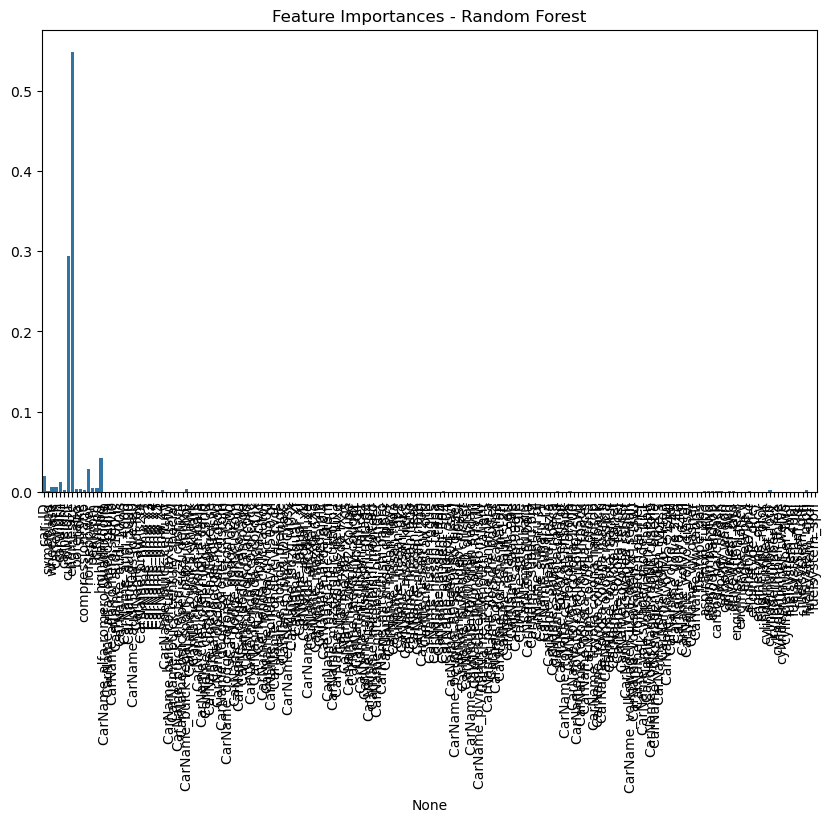

In [56]:
# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importances_rf)
plt.title("Feature Importances - Random Forest")
plt.xticks(rotation=90)
plt.show()

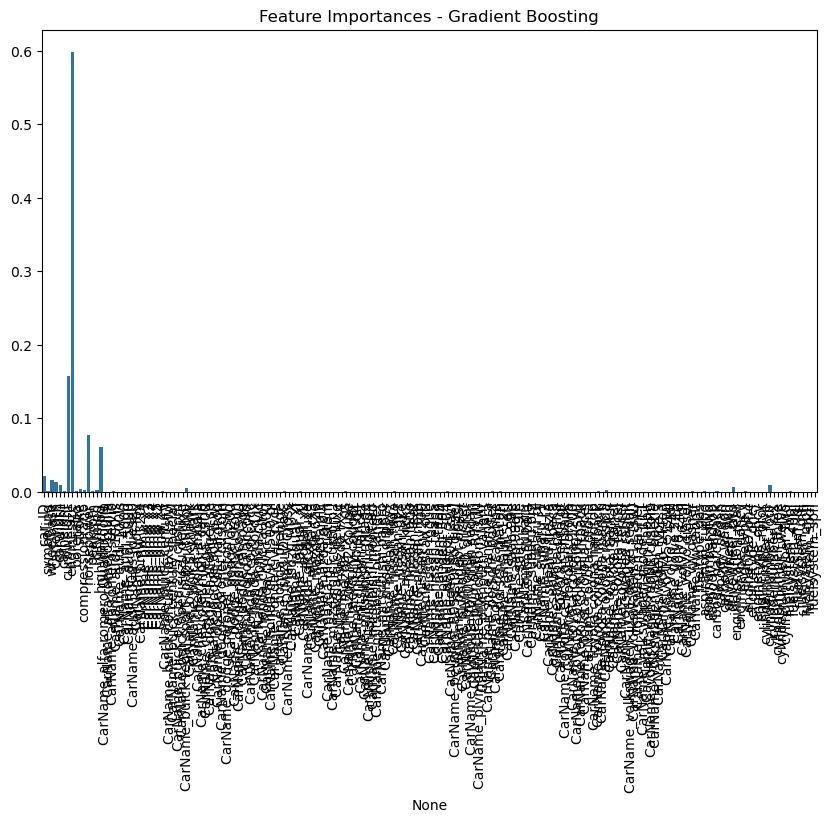

In [58]:
# Plot feature importances for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=feature_importances_gb)
plt.title("Feature Importances - Gradient Boosting")
plt.xticks(rotation=90)
plt.show()

In [62]:
# 5. Hyperparameter Tuning (Example for Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the tuned model
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
evaluate_model('Tuned Random Forest', y_test, y_pred_best_rf)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Model: Tuned Random Forest
R-squared: 0.9528
MSE: 3722559.9635
MAE: 1380.4867

